C:\Users\sinjan\AppData\Local\Temp\ipykernel_15484\3871064799.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Task'] = data['Task'].fillna(method='ffill')


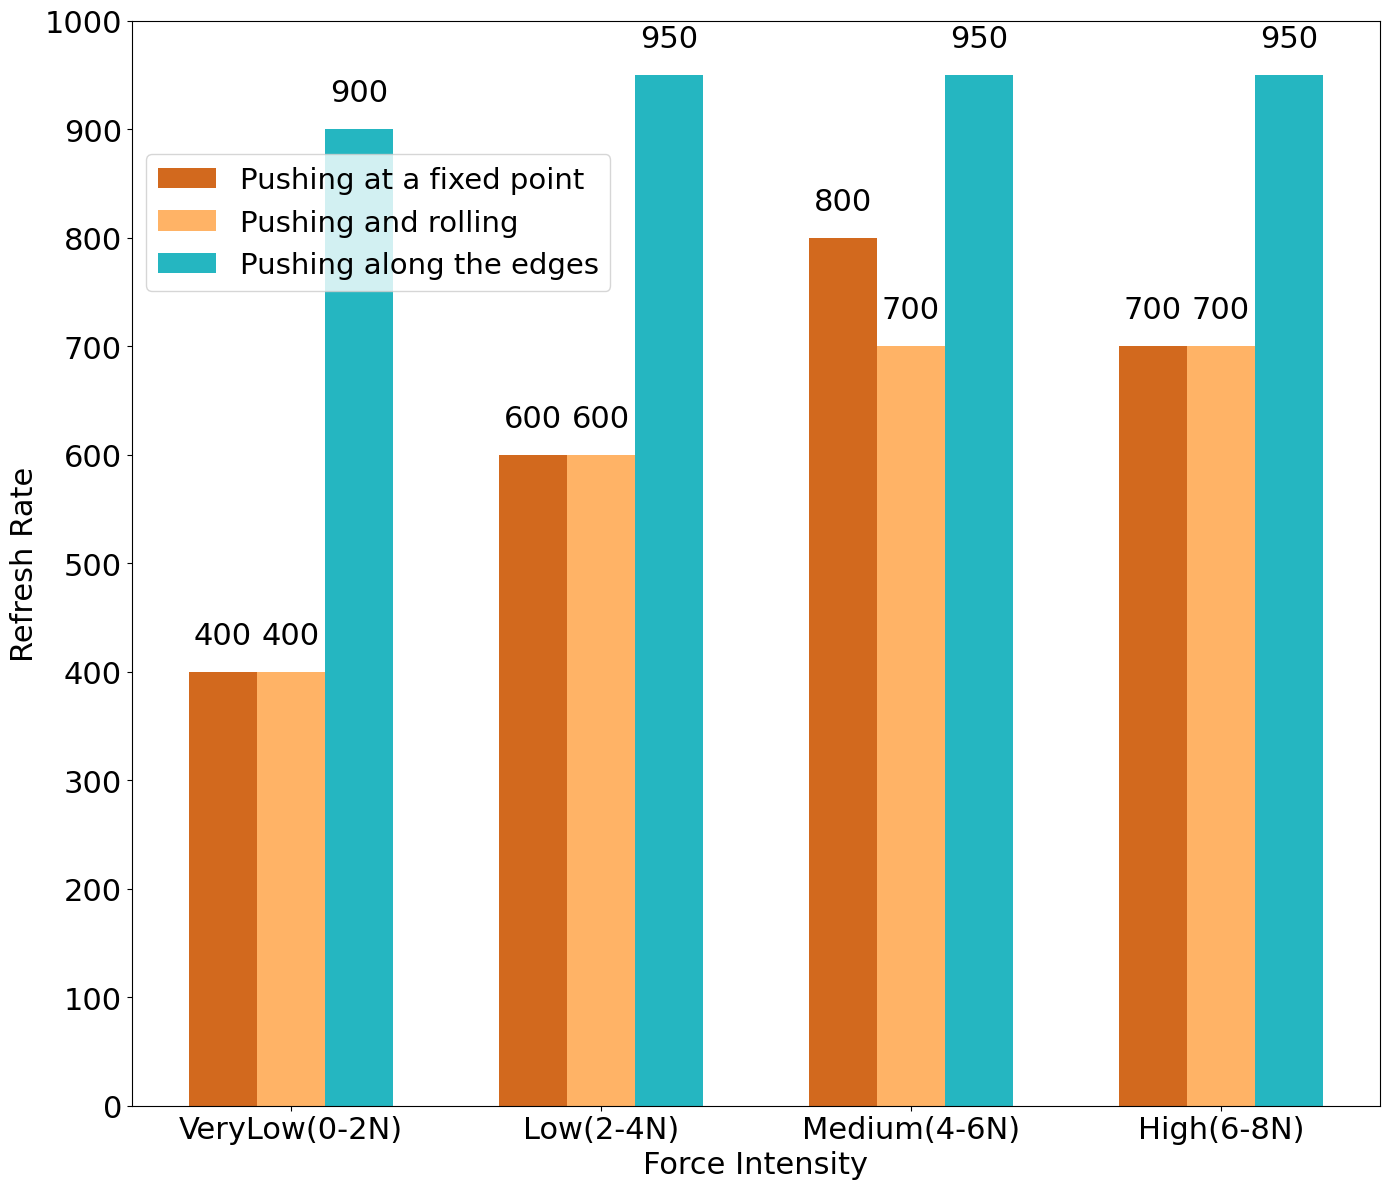

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_excel("C:\\Users\\sinjan\\Downloads\\RecommendedForce_Upper.xlsx", sheet_name='Sheet1')

# Fill missing Task values forward
data['Task'] = data['Task'].fillna(method='ffill')

# Extract force level for easier plotting
data['Force Level'] = data['Force Intensity'].str.extract(r'([A-Za-z]+)')

# Set the order for force levels and tasks
force_order = ['VeryLow', 'Low', 'Medium', 'High']
task_order = ['Pushing at a fixed point', 'Pushing and rolling', 'Pushing along the edges']
#task_order = ['Pushing', 'Rolling', 'Pushing Edges']
#colors = ['#f2ecd2', '#ffb366', '#25b6c1']  # Match the example's color scheme
colors = ['chocolate', '#ffb366', '#25b6c1']

# Prepare data for plotting
bar_width = 0.22
x = np.arange(len(force_order))

# Get Fisher values for each task
fisher_values = []
for task in task_order:
    vals = []
    for force in force_order:
        val = data[(data['Task'] == task) & (data['Force Level'] == force)]['TOST(alpha = 0.05, delta = 0.3)']
        vals.append(val.values[0] if not val.empty else 0)
    fisher_values.append(vals)

# Create the grouped bar chart
plt.figure(figsize=(14, 12))
for idx, (task, vals) in enumerate(zip(task_order, fisher_values)):
    bars = plt.bar(x + idx*bar_width, vals, width=bar_width, label=task, color=colors[idx])
    # Add values on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 20, int(yval), ha='center', va='bottom', fontsize=22)

plt.xlabel('Force Intensity', fontsize=22)
plt.ylabel('Refresh Rate', fontsize=22)
#plt.title('Haptic threshold comparison for each task under Varying Force Intensity', fontsize=14)
plt.xticks(x + bar_width, ['VeryLow(0-2N)', 'Low(2-4N)', 'Medium(4-6N)', 'High(6-8N)'], fontsize=22)
plt.legend(fontsize=21, title_fontsize=22, loc='upper left', bbox_to_anchor=(0, 0.89))
plt.ylim(0, 1000)  # Set y-axis range from 0 to 1000
plt.yticks(range(0, 1100, 100), fontsize=22)  # Set y-axis ticks in increments of 100
plt.tight_layout()
plt.savefig('Recommnded_frequency_upper_bound.png')
plt.show()